In [65]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation,rc
#from mpl_toolkits.mplot3d import Axes3D


def ejes3d(x0,y0,z0,x1,y1,z1,ejes='x'):
    #fig=plt.figure(figsize=(8,6),dpi=80)
    #ax = plt.Axes(fig,[0.,0.,1.,1.])
    fig = plt.figure()
    #ax = Axes3D(fig)
    #fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.set_xlim([x0,x1])
    ax.set_ylim([y0,y1])
    ax.set_zlim([z0,z1])
    ax.set_xlabel('$'+ejes+'_0$')
    ax.set_ylabel('$'+ejes+'_1$')
    ax.set_zlabel('$'+ejes+'_2$')
    punto3d(ax,(0,0,0),nombre=r'$\vec{0}$')

    return fig,ax

#def animacion_paso_3d(ax):
#    return lambda i: ax.view_init(elev=10., azim=i)

def dibujo():                           # En esta rutina se colocan los puntos y líneas para la animación
    return fig,    

def animacion_paso_3d(ax,fig,angulo):
    ax.view_init(elev=10., azim=angulo)
    return fig, 

def animacion3d(fig,ax,dibujo=dibujo, fps=5, segundos=4):
    plt.close(fig)
    rc('animation', html='jshtml')
    frames=fps*segundos
    return animation.FuncAnimation(fig, lambda i : animacion_paso_3d(ax,fig,i/frames*90), init_func=dibujo,
                               frames=frames, interval=int(1000/fps), blit=True)

def linea3d(ax,u,v=(0,0,0),color='k',**kwargs):
    ax.plot((u[0],v[0]),(u[1],v[1]),(u[2],v[2]),color)

def plano3d(ax,u,v,color='k',**kwargs):
    x_min,x_max=ax.get_xlim()
    y_min,y_max=ax.get_ylim()
    det=u[0]*v[1]-u[1]*v[0]
    kx=(v[1]*u[2]-u[1]*v[2])/det
    ky=-(v[0]*u[2]-u[0]*v[2])/det

    xx=[[x_min,x_max],[x_min,x_max]]
    yy=[[y_min,y_min],[y_max,y_max]]
    zz=np.array([[kx*x_min+ky*y_min,kx*x_max+ky*y_min],[kx*x_min+ky*y_max,kx*x_max+ky*y_max]]).astype(np.float64)

    ax.plot_surface(xx, yy, zz, alpha=0.2)
    #ax.scatter(u[0], u[1], u[2], color='green')
    #ax.scatter(v[0], v[1], v[2], color='green')

    
def punto3d(ax,v,nombre='',fontsize=15, c="goldenrod",**kwargs):
    ax.scatter(v[0],v[1],float(v[2]), marker='o', s=20, c="goldenrod", alpha=0.6)
    if nombre!='':
        ax.text(v[0],v[1],v[2],nombre,fontsize=fontsize)        

def p(v):
    return '('+', '.join([str(ai) for ai in v])+')\u209c'

Con el fin de aumentar la velocidad de ejecución, para las pruebas puede disminuir los `fps` y los `segundos` en la rutina  `animacion3d`.

# Coordenadas

Recordemos que las columnas de una matriz $B$ de tamaño $m \times n$, forman una **base de un subespacio $S$** si y solo si
* $\text{Co}(B)=S$ y
* $B$ es LI

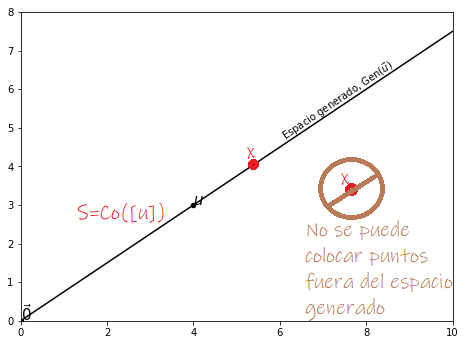

Si $\vec{x}$ está en el subespacio $S$, entonces debe existir un <u>único</u> vector $\vec{t} \in \mathbb{R}^n$ tal que 

$$B\vec{t}=\vec{x}$$

En este caso $\vec{t}$ se llama las **coordenadas de  $\vec{x}$ en la base $B$** y se denota

$$\vec{t}=[\vec{x}]_B$$

Informalmente hablando, es como si se despejara $\vec{t}$, de la ecuación $B\vec{t}=\vec{x}$, pero hay principalmente dos diferencias respecto a la inversa:
* no es necesario que la matriz $B$ sea cuadrada (pero para que $B$ sea LI no pueden haber más columnas que renglones),
* $\vec{x}$ debe estar en el subespacio $S$.


# Ejemplo 1

In [66]:
u3_0=sp.Matrix([9,
                3,
                6])

u3_1=sp.Matrix([2,
                8,
                5])


fig,ax=ejes3d(0,0,0,10,10,10)  # Define el eje de coordenadas
                              # Desde la coordenada (0,0,0)ₜ
                              # Hasta la coordenada (10,10,10)ₜ

punto3d(ax,u3_0,nombre=r'$\vec{u}_0$')  # Coloca el punto
punto3d(ax,u3_1,nombre=r'$\vec{u}_1$')  # Coloca el punto

animacion3d(fig,ax)  # Genera la animación para rotar  

(1) La matriz $B=\left[\matrix{ 9 & 2 \\ 3 & 8 \\ 6 & 5 }\right]$ es LI. Por lo tanto, es una base de $\text{Co}(B)$.

(2) La dimensión del espacio es el número de columnas de la base. En este caso la dimensión del espacio es 2.

(3) Geométricamente hablando, el espacio generado es un plano que pasa por el origen, por el vector $\left(\matrix{9\\3\\6}\right)$ y por el vector $\left(\matrix{2\\8\\5}\right)$.

(4) A continuación se visualiza el plano generado. Observe que, aunque el plano fue generado sólo con dos vectores, los tres vectores se encuentran en el plano.

In [67]:
fig,ax=ejes3d(0,0,0,12,12,12)  # Define el eje de coordenadas
                              # Desde la coordenada (0,0,0)ₜ
                              # Hasta la coordenada (10,10,10)ₜ
M=sp.Matrix([[ 9, 2, 11], [ 3, 8, 11], [6, 5,  11]])
u=M[:,0]
v=M[:,1]
#w=M[:,2]

punto3d(ax,u,nombre=r'$\vec{u}_0$')  # Coloca el punto
punto3d(ax,v,nombre=r'$\vec{u}_1$')  # Coloca el punto
#punto3d(ax,w,nombre=r'$\vec{u}_2$')  # Coloca el punto
plano3d(ax,u,v,color='k')

animacion3d(fig,ax)  # Genera la animación para rotar  


(5) Cual es el punto $\vec{x}$ con coordenada $\vec{t}=\left(\matrix{3\\2}\right)$ en la base $B$. 
 
 
 

In [68]:
fig,ax=ejes3d(0,0,0,35,35,35)  # Define el eje de coordenadas

u=sp.Matrix([9,
             3,
             6]) # Primer vector de la base
v=sp.Matrix([2,
             8,
             5]) # Segundo vector de la base
w=sp.Matrix([31,
             25,
             28]) #Vector con coordenadas (3,2)ₜ  

punto3d(ax,u,nombre=r'$\vec{u}_0$')  # Coloca el punto
punto3d(ax,v,nombre=r'$\vec{u}_1$')  # Coloca el punto
punto3d(ax,3*u,nombre=r'$3\vec{u}_0$')  # Coloca el punto
punto3d(ax,2*v,nombre=r'$2\vec{u}_1$')  # Coloca el punto
punto3d(ax,w,nombre=r'$\vec{u}_2=3\vec{u}_0+2\vec{u}_1$')  # Coloca el punto
plano3d(ax,u,v,color='k')

animacion3d(fig,ax)  # Genera la animación para rotar  


Solución:
Sabemos que las coordenadas $\vec{t}$ del vector $\vec{x}$ en la base $B$ cumplen la siguiente relación:

$B\vec{t}=\vec{x}$ 

Como se conoce la base $B=\left[\matrix{ 9 & 2 \\ 3 & 8  \\ 6 & 5 }\right]$ y las coordenadas $\vec{t}=\left(\matrix{3\\2}\right)$ entonces sólo hay que calcular el resultado.

$\left[\matrix{ 9 & 2  \\ 3 & 8  \\ 6 & 5  }\right]\left(\matrix{3\\2}\right)= $

In [69]:
sp.Matrix([[ 9, 2], 
           [ 3, 8], 
           [ 6, 5]])*sp.Matrix([3,
                                2])

Matrix([
[31],
[25],
[28]])

Observe que el vector $\vec{u}_2$ se puede alcanzar usando como guía el vector $\vec{u}_0$ y $\vec{u}_1$. De esta forma sólo requiere dos coordenadas $\left(\matrix{3\\2}\right)$, a pesar de que está en $\mathbb{R}^3$

(6) Encuentre las coordenadas $\vec{t}$ en la base $B=\left[\matrix{ 9 & 2 \\ 3 & 8  \\ 6 & 5 }\right]$ del punto $\vec{x}=\left(\matrix{13\\19\\16}\right)$

In [70]:
fig,ax=ejes3d(0,0,0,20,20,20)  # Define el eje de coordenadas

u=sp.Matrix([9,
             3,
             6]) # Primer vector de la base
v=sp.Matrix([2,
             8,
             5]) # Segundo vector de la base
w=sp.Matrix([13,
             19,
             16]) #Vector con coordenadas (3,2)ₜ  

punto3d(ax,u,nombre=r'$\vec{u}$')  # Coloca el punto
punto3d(ax,v,nombre=r'$\vec{v}$')  # Coloca el punto
punto3d(ax,w,nombre=r'$\vec{x}=(13,19,16)ₜ$')  # Coloca el punto
plano3d(ax,u,v,color='k')

animacion3d(fig,ax)  # Genera la animación para rotar  


Solución:
Hay que encontrar las coordenada $\vec{t}$ que cumpla

$\left[\matrix{ 9 & 2  \\ 3 & 8  \\ 6 & 5 }\right]\vec{t}= \left(\matrix{13\\19\\16}\right)$

Para esto hay que solucionar la siguiente matriz extendida usando el algoritmo de eliminación de Gauss.

In [71]:
M=sp.Matrix([[ 9, 2, 13], 
           [ 3, 8, 19], 
           [ 6, 5, 16]])
M

Matrix([
[9, 2, 13],
[3, 8, 19],
[6, 5, 16]])

In [72]:
M.row_swap(0,1)
M

Matrix([
[3, 8, 19],
[9, 2, 13],
[6, 5, 16]])

In [73]:
M[1,:] += -3*M[0,:]
M[2,:] += -2*M[0,:]
M

Matrix([
[3,   8,  19],
[0, -22, -44],
[0, -11, -22]])

In [74]:
M.row_swap(1,2)
M

Matrix([
[3,   8,  19],
[0, -11, -22],
[0, -22, -44]])

In [75]:
M[2,:] += -2*M[1,:]
M[0,:] += M[1,:]*8/11
M

Matrix([
[3,   0,   3],
[0, -11, -22],
[0,   0,   0]])

In [76]:
M[0,:] *= sp.Rational(1,3)
M[1,:] *= -sp.Rational(1,11)
M

Matrix([
[1, 0, 1],
[0, 1, 2],
[0, 0, 0]])

$\begin{align}
1t_0 + 0t_1 = 1 \\
0t_0 + 1t_1 = 2 \\
0t_0 + 0t_1 = 0 
\end{align}$

Entonces las coordenadas son 

$\vec{t}=\left(\matrix{1 \\ 2 }\right)$

# Ejemplo 2



In [77]:
u4_0=sp.Matrix([4,
                2,
                8])
# u4_1=sp.Matrix([2,
#                 1,
#                 4])
# u4_2=sp.Matrix([6,
#                 3,
#                 12])


fig,ax=ejes3d(0,0,0,10,10,10)  # Define el eje de coordenadas
                              # Desde la coordenada (0,0,0)ₜ
                              # Hasta la coordenada (10,10,10)ₜ

punto3d(ax,u4_0,nombre=r'$\vec{u}_0$')  # Coloca el punto
#punto3d(ax,u4_1,nombre=r'$\vec{u}_1$')  # Coloca el punto
#punto3d(ax,u4_2,nombre=r'$\vec{u}_2$')  # Coloca el punto

animacion3d(fig,ax)  # Genera la animación para rotar  



(1) $B=\left[\matrix{ 4 \\ 2  \\ 8 }\right]$ es LI. Por lo tanto, es una base de $\text{Co}(B)$.

(2) Como la base sólo tiene una columna, la dimensión del espacio columna es 1

(3) Geométricamente, el espacio columna es una recta que pasa por $\left(\matrix{ 0 \\ 0 \\0}\right)$ y $\left(\matrix{ 4 \\ 2 \\ 8 }\right)$.

(4) A continuación se visualiza la recta generada. Observe que, aunque la recta fue generada sólo con un vector, los tres vectores se encuentran en la recta.



In [78]:
fig,ax=ejes3d(0,0,0,10,10,10)  # Define el eje de coordenadas
                              # Desde la coordenada (0,0,0)ₜ
                              # Hasta la coordenada (10,10,10)ₜ

punto3d(ax,u4_0,nombre=r'$\vec{u}_0$')  # Coloca el punto
#punto3d(ax,u4_1,nombre=r'$\vec{u}_1$')  # Coloca el punto
#punto3d(ax,u4_2,nombre=r'$\vec{u}_2$')  # Coloca el punto
linea3d(ax,2.1*u4_0)  # Coloca  las línea entre dos extremos, si solo hay un extremo el otro es el origen


animacion3d(fig,ax)  # Genera la animación para rotar  

(5) ¿Cuál es el punto $\vec{x}$ con coordenada $\vec{t}=(2)$ en la base $\left[\matrix{4\\2\\8}\right]$?

In [79]:
u4_0=sp.Matrix([4,
                2,
                8])


fig,ax=ejes3d(0,0,0,20,20,20)  # Define el eje de coordenadas
                              # Desde la coordenada (0,0,0)ₜ
                              # Hasta la coordenada (10,10,10)ₜ

punto3d(ax,u4_0,nombre=r'$\vec{u}_0$')  # Coloca el punto
punto3d(ax,2*u4_0,nombre=r'$2\vec{u}_0$')  # Coloca el punto
linea3d(ax,3.1*u4_0)  # Coloca  las línea entre dos extremos, si solo hay un extremo el otro es el origen


animacion3d(fig,ax)  # Genera la animación para rotar  

Solución:
Sabemos que las coordenadas $\vec{t}$ del vector $\vec{x}$ en la base $B$ cumplen la siguiente relación:

$B\vec{t}=\vec{x}$ 

Como se conoce la base $B=\left[\matrix{4\\2\\8}\right]$ y la coordenada $\vec{t}=(2)$ entonces sólo hay que calcular el resultado.

$\left[\matrix{4\\2\\8}\right](2)= \left(\matrix{8\\4\\16}\right)$

(6) Encuentre la coordenada $\vec{t}$ en la base $\left[\matrix{4\\2\\8}\right]$ del punto $\vec{x}=\left(\matrix{2\\1\\4}\right)$

In [80]:
u4_0=sp.Matrix([4,
                2,
                8])


fig,ax=ejes3d(0,0,0,10,10,10)  # Define el eje de coordenadas
                              # Desde la coordenada (0,0,0)ₜ
                              # Hasta la coordenada (10,10,10)ₜ

punto3d(ax,u4_0,nombre=r'$\vec{u}_0$')  # Coloca el punto
punto3d(ax,(2,1,4),nombre=r'$\vec{x}=(2,1,4)ₜ$')  # Coloca el punto
linea3d(ax,3.1*u4_0)  # Coloca  las línea entre dos extremos, si solo hay un extremo el otro es el origen


animacion3d(fig,ax)  # Genera la animación para rotar  

Solución:

 En este caso se conoce la base $B=\left[\matrix{4\\2\\8}\right]$ y el punto $\vec{x}=\left(\matrix{2\\1\\4}\right)$ y tenemos que encontrar la coordenada $\vec{t}$ que cumpla

$\left[\matrix{4\\2\\8}\right]\vec{t}= \left(\matrix{2\\1\\ 4}\right)$

En este caso es fácil comprobar que $\vec{t}=\frac{1}{2}$


# Ejemplo 3

In [91]:
u3_0=sp.Matrix([9,
                3,
                6])

u3_1=sp.Matrix([2,
                8,
                5])

u3_2=sp.Matrix([1,
                2,
                7])

# u3_3=sp.Matrix([1,
#                 2,
#                 7])

fig,ax=ejes3d(0,0,0,12,12,12)  # Define el eje de coordenadas
                              # Desde la coordenada (0,0,0)ₜ
                              # Hasta la coordenada (10,10,10)ₜ

punto3d(ax,u3_0,nombre=r'$\vec{u}_0$')  # Coloca el punto
punto3d(ax,u3_1,nombre=r'$\vec{u}_1$')  # Coloca el punto
punto3d(ax,u3_2,nombre=r'$\vec{u}_2$')  # Coloca el punto
#punto3d(ax,u3_3,nombre=r'$\vec{u}_3$')  # Coloca el punto

animacion3d(fig,ax)  # Genera la animación para rotar  

In [92]:
M=sp.Matrix([[ 9, 2, 1], 
           [ 3, 8, 2], 
           [ 6, 5, 7]])
M




Matrix([
[9, 2, 1],
[3, 8, 2],
[6, 5, 7]])

In [94]:
M.row_swap(0,1)
M

Matrix([
[3, 8, 2],
[9, 2, 1],
[6, 5, 7]])

In [95]:
M[1,:]+=-3*M[0,:]
M[2,:]+=-2*M[0,:]
M

Matrix([
[3,   8,  2],
[0, -22, -5],
[0, -11,  3]])

In [96]:
M[2,:]+=M[1,:]*-1/2
M

Matrix([
[3,   8,    2],
[0, -22,   -5],
[0,   0, 11/2]])

(1) La matriz $B=\left[\matrix{ 9 & 2 & 1\\ 3 & 8 & 2 \\ 6 & 5 & 7 }\right]$ es LI. Por lo tanto, es una base de $\text{Co}(B)$.

(2) La dimensión del espacio es el número de columnas de la base. En este caso la dimensión del espacio es 3.

(3) Geométricamente hablando, el espacio generado es todo $\mathbb{R}^3$. Esto se puede concluir de dos formas. 
* Primero, porque la dimensión es 3.
* Segundo, porque hay un l-pivote en cada renglón.

(4) Visualizar que genera todo el espacio no es fácil, en todo caso lo traté de representar con este cubo que llena todo el  sistema coordenado.

<ipython-input-82-a6a48a9fcc94>:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


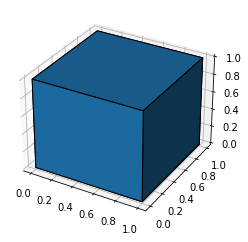

In [82]:
# Omitir este código
# Este código pretende ilustrar que el espacio generado es todo R**3
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(np.ones((1,1,1)), edgecolor="k")
plt.show()

In [97]:
M=sp.Matrix([[ 9, 2, 1], 
           [ 3, 8, 2], 
           [ 6, 5, 7]])
M



Matrix([
[9, 2, 1],
[3, 8, 2],
[6, 5, 7]])

In [99]:
prim_col=4*M[:,0]
seg_col=2*M[:,1]
ter_col=3*M[:,2]
prim_col, seg_col, ter_col, prim_col + seg_col + ter_col

(Matrix([
 [36],
 [12],
 [24]]),
 Matrix([
 [ 4],
 [16],
 [10]]),
 Matrix([
 [ 3],
 [ 6],
 [21]]),
 Matrix([
 [43],
 [34],
 [55]]))


(5) Cual es el punto $\vec{x}$ con coordenada $\vec{t}=\left(\matrix{4\\2\\3}\right)$ en la base $B$. 
 
Solución:
Sabemos que las coordenadas $\vec{t}$ del vector $\vec{x}$ en la base $B$ cumplen la siguiente relación:

$B\vec{t}=\vec{x}$ 

Como se conoce la base $B=\left[\matrix{ 9 & 2 & 1 \\ 3 & 8 & 2 \\ 6 & 5 & 7 }\right]$ y las coordenadas $\vec{t}=\left(\matrix{4\\2\\3}\right)$ entonces sólo hay que calcular el resultado.

$\left[\matrix{ 9 & 2 & 1 \\ 3 & 8 & 2 \\ 6 & 5 & 7 }\right]\left(\matrix{4\\2\\3}\right)= $

In [83]:
sp.Matrix([[ 9, 2, 1], 
           [ 3, 8, 2], 
           [ 6, 5, 7]])*sp.Matrix([4,
                                   2,
                                   3])

Matrix([
[43],
[34],
[55]])

(6) Encuentre la coordenada $\vec{t}$ en la base $B$ del punto $\vec{x}=\left(\matrix{2\\1\\\frac{3}{2}}\right)$


Solución:
En este caso se conoce la base $B=\left[\matrix{ 9 & 2 & 1 \\ 3 & 8 & 2 \\ 6 & 5 & 7 }\right]$ y el punto $\vec{x}=\left(\matrix{2\\1\\\frac{3}{2}}\right)$ y tenemos que encontrar las coordenada $\vec{t}$ que cumpla

$\left[\matrix{ 9 & 2 & 1 \\ 3 & 8 & 2 \\ 6 & 5 & 7 }\right]\vec{t}= \left(\matrix{2\\1\\ \frac{3}{2}}\right)$

Para esto hay que solucionar la siguiente matriz extendida usando el algoritmo de eliminación de Gauss.


In [84]:
M=sp.Matrix([[ 9, 2, 1, 2], 
           [ 3, 8, 2, 1], 
           [ 6, 5, 7, sp.Rational(3,2)]])
M

Matrix([
[9, 2, 1,   2],
[3, 8, 2,   1],
[6, 5, 7, 3/2]])

In [85]:
M.row_swap(0,1)
M

Matrix([
[3, 8, 2,   1],
[9, 2, 1,   2],
[6, 5, 7, 3/2]])

In [86]:
M[1,:] += -3*M[0,:]
M[2,:] += -2*M[0,:]
M

Matrix([
[3,   8,  2,    1],
[0, -22, -5,   -1],
[0, -11,  3, -1/2]])

In [87]:
M.row_swap(1,2)
M

Matrix([
[3,   8,  2,    1],
[0, -11,  3, -1/2],
[0, -22, -5,   -1]])

In [88]:
M[2,:] += -2*M[1,:]
M[0,:] += M[1,:]*8/11
M

Matrix([
[3,   0, 46/11, 7/11],
[0, -11,     3, -1/2],
[0,   0,   -11,    0]])

In [89]:
M[0,:] += M[2,:]*46/121
M[1,:] += M[2,:]*3/11
M

Matrix([
[3,   0,   0, 7/11],
[0, -11,   0, -1/2],
[0,   0, -11,    0]])

In [90]:
M[0,:] *= sp.Rational(1,3)
M[1,:] *= -sp.Rational(1,11)
M[2,:] *= -sp.Rational(1,11)
M

Matrix([
[1, 0, 0, 7/33],
[0, 1, 0, 1/22],
[0, 0, 1,    0]])

Entonces las coordenadas son $\vec{x}=\left(\matrix{\frac{7}{33} \\ \frac{1}{22} \\ 0}\right)$

# Coordenadas en la base estándar $I_n$

Recordemos que la base estándar de $\mathbb{R}^n$ es la matriz identidad $I_n$.

Por ejemplo $I_3=\left[\begin{matrix}1 & 0 & 0\\0 & 1 & 0\\0 & 0 & 1\end{matrix}\right]$

Además, como $ \vec{t} = I_n \vec{t} = \vec{x} $, entonces las coordenadas de cualquier vector en la base estándar es el mismo vector.



